# **Exploratory Data Analysis** 

for: https://www.kaggle.com/datasets/jsphyg/tipping/data 

# Import the importat libraries

In [35]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset

In [36]:
data=pd.read_csv("tips.csv")

In [37]:
df=pd.DataFrame(data)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [38]:
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df.shape

(244, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# Missing values 

In [41]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Description


In [42]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [43]:
df.describe(include="object")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# Total Bill and Tip

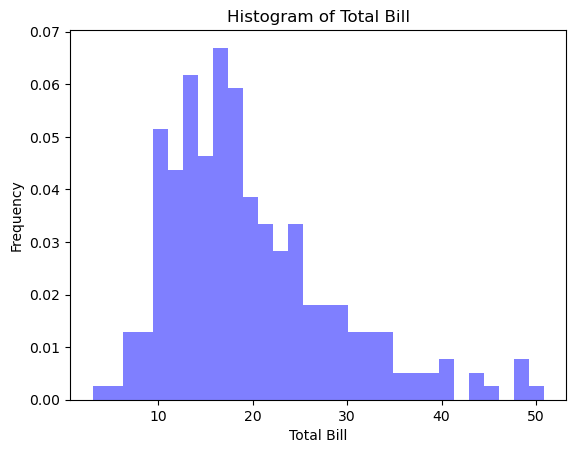

In [44]:
# Build the histogram

plt.hist(df['total_bill'], bins=30,density=True,alpha= 0.5, color='blue')
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

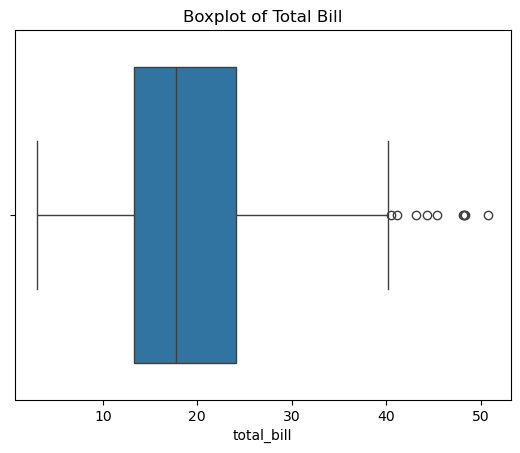

In [45]:
# Build the boxplot

sns.boxplot(x=df['total_bill'])
plt.title('Boxplot of Total Bill')
plt.show()

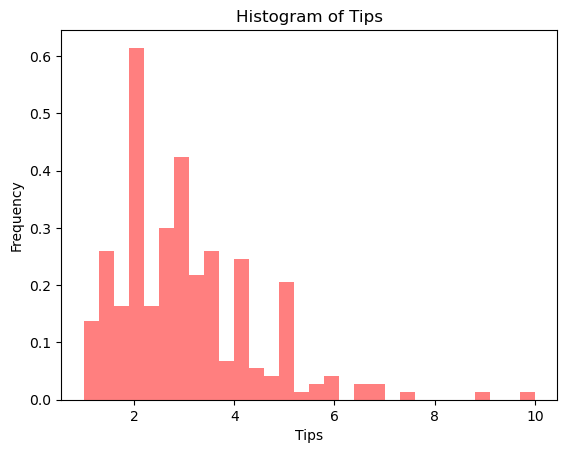

In [46]:
#   Build histogram of tips

plt.hist(df['tip'],bins=30,density=True,alpha=0.5,color='red')
plt.title('Histogram of Tips')
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.show()

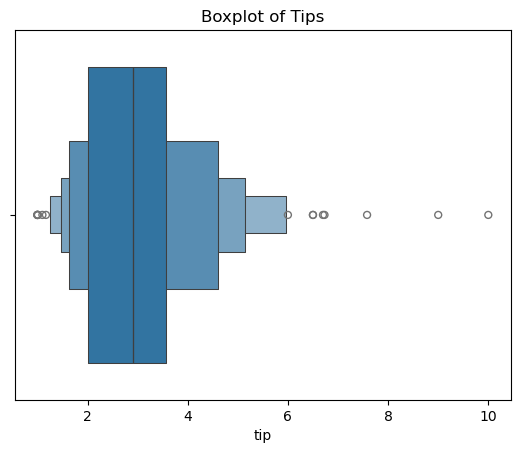

In [47]:
# Build the boxplot

sns.boxenplot(x=df['tip'])
plt.title('Boxplot of Tips')
plt.show()

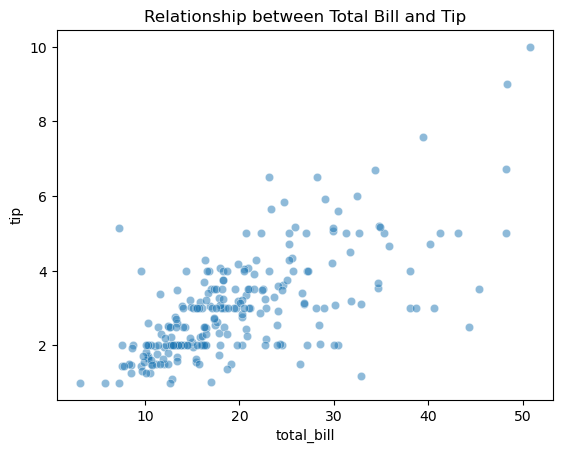

In [48]:
# Relationship between total bill and tip

sns.scatterplot(x='total_bill', y='tip', data=df , alpha=0.5)
plt.title('Relationship between Total Bill and Tip')
plt.show()

In [49]:
# corrolation between total bill and tip

correlation = df['total_bill'].corr(df['tip'])
print(f"Corrolation coefficient between total bill and tip: {correlation}")

Corrolation coefficient between total bill and tip: 0.6757341092113641


# Smoker VS Non-Smoker

In [50]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

C:\Users\somai\AppData\Local\Temp\ipykernel_9900\1471822200.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




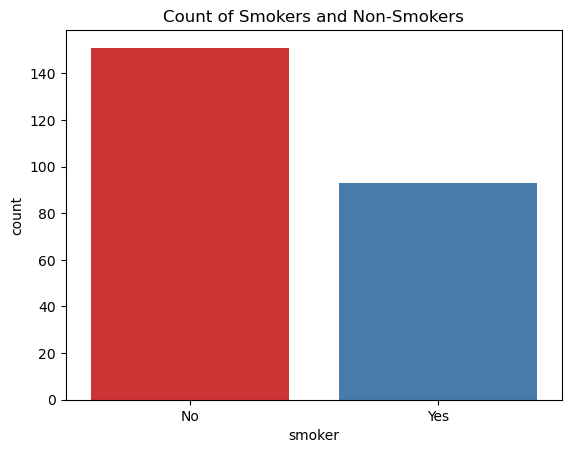

In [51]:
# Distribution of categorical variables

sns.countplot(x='smoker', data=df, palette='Set1')
plt.title('Count of Smokers and Non-Smokers')
plt.show()

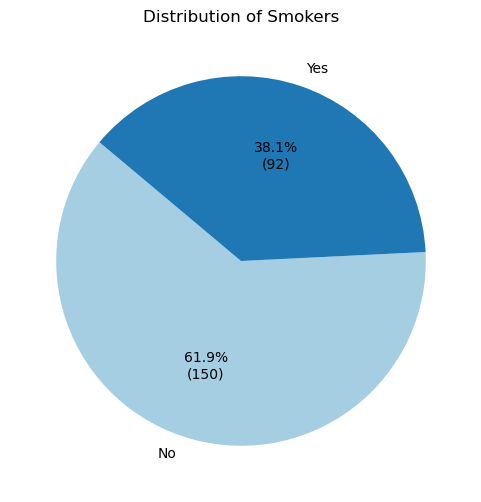

In [52]:
# Count the occurrences of smokers and non-smokers
smoking = df["smoker"].value_counts()

# Function to add data labels
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(smoking, labels=smoking.index, autopct=lambda pct: func(pct, smoking), startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Smokers')
plt.show()

C:\Users\somai\AppData\Local\Temp\ipykernel_9900\475311515.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




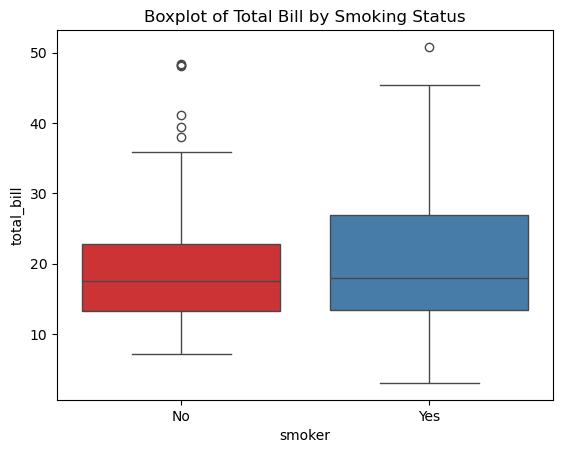

In [53]:
# Distribution of total bill for smokers and non-smokers

sns.boxplot(x='smoker', y='total_bill', data=df, palette='Set1')
plt.title('Boxplot of Total Bill by Smoking Status')
plt.show()

# Time

In [54]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

C:\Users\somai\AppData\Local\Temp\ipykernel_9900\2021448015.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




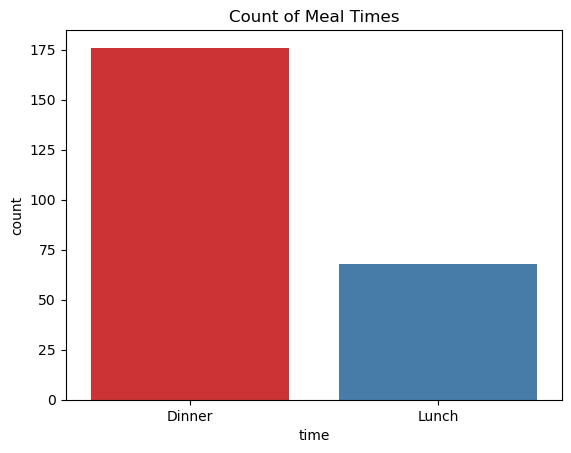

In [55]:
# Distribution of categorical variables

sns.countplot(x='time', data=df, palette='Set1')
plt.title('Count of Meal Times')
plt.show()


C:\Users\somai\AppData\Local\Temp\ipykernel_9900\1779116058.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




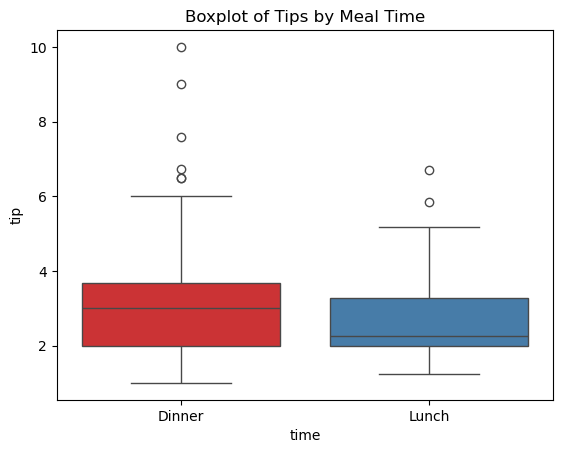

In [56]:
# Distribution of tips for different meal times

sns.boxplot(x='time', y='tip', data=df, palette='Set1')
plt.title('Boxplot of Tips by Meal Time')
plt.show()

# Day

In [57]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

C:\Users\somai\AppData\Local\Temp\ipykernel_9900\4078576886.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




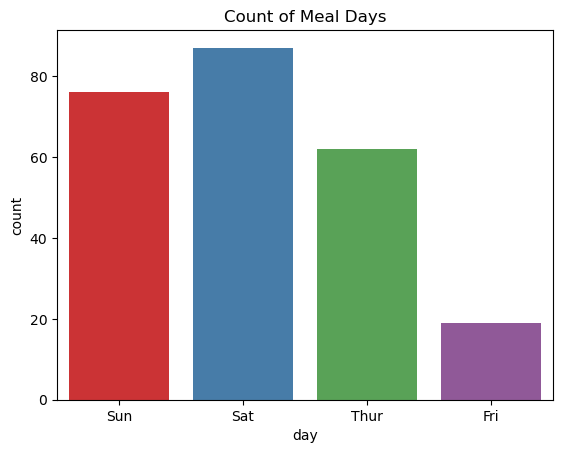

In [58]:
# Distribution of categorical variables

sns.countplot(x='day', data=df, palette='Set1')
plt.title('Count of Meal Days')
plt.show()

# Tip of Day

C:\Users\somai\AppData\Local\Temp\ipykernel_9900\2169000422.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




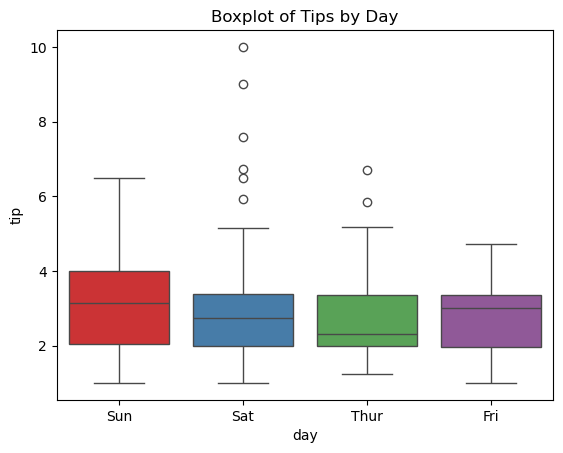

In [59]:
# Boxplot of tips by day

sns.boxplot(x='day', y='tip', data=df, palette='Set1')
plt.title('Boxplot of Tips by Day')
plt.show()

In [60]:
total_tips_by_day = df.groupby('day')['tip'].sum()
df_total_tips_by_day=total_tips_by_day.reset_index().sort_values(by='tip', ascending=False)
df_total_tips_by_day

,day,tip
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83
0,Fri,51.96


C:\Users\somai\AppData\Local\Temp\ipykernel_9900\3456575866.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




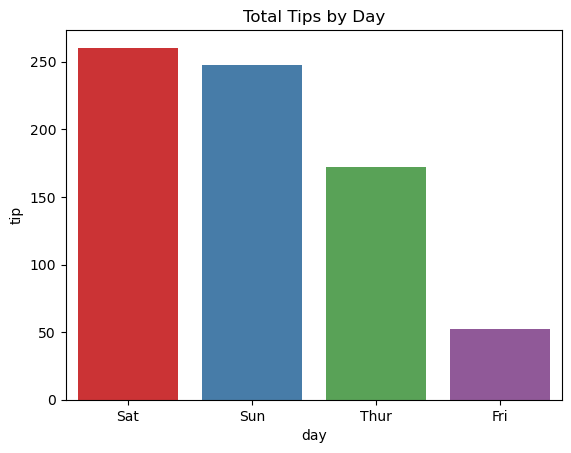

In [61]:
# Distribution of tips by day

sns.barplot(x='day', y='tip', data=df_total_tips_by_day, palette='Set1')
plt.title('Total Tips by Day')
plt.show()

In [62]:
fig =px.pie(df,values='tip',names='day',title='Total Tips by Day',hole=0.3)
fig.show()

In [63]:
px.pie(df,values='tip',names='time',title='Total',hole=0.5)

# Gender


C:\Users\somai\AppData\Local\Temp\ipykernel_9900\524356330.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




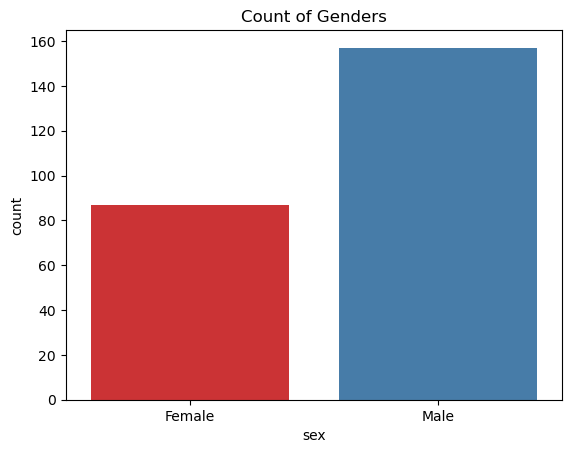

In [64]:
# Distribution of gender

sns.countplot(x='sex', data=df, palette='Set1')
plt.title('Count of Genders')
plt.show()

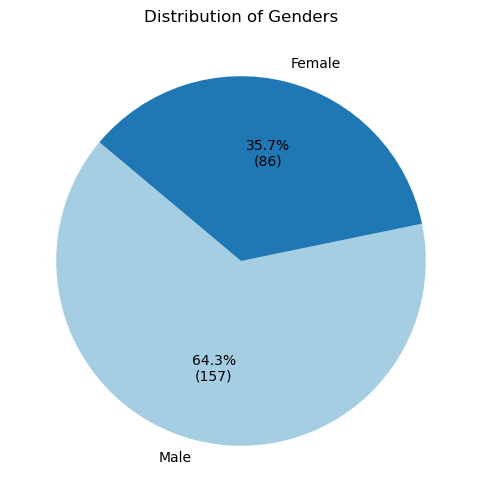

In [65]:
# Count the occurrences of each gender
gender_counts = df['sex'].value_counts()

# Function to add data labels
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts), startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Genders')
plt.show()

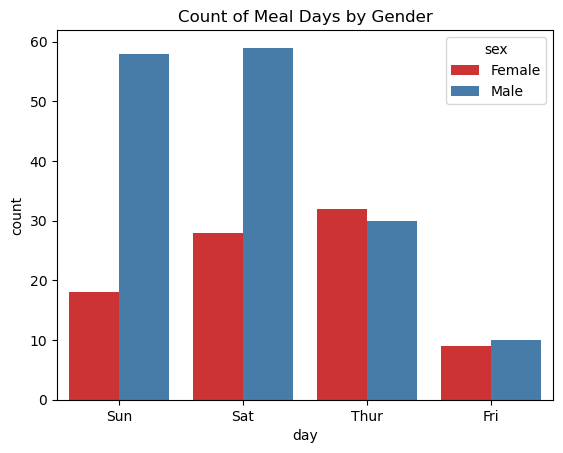

In [66]:
# Distribution of categorical variables

sns.countplot(x='day', hue='sex', data=df, palette='Set1')
plt.title('Count of Meal Days by Gender')
plt.show()

In [67]:
# Aggregate the data based on day and time

agg_data=df.groupby(['day','time'])['tip'].sum().reset_index()

In [68]:
# Create a sunburst plot

fig = px.sunburst(agg_data, path=['day', 'time'], values='tip', title='Total Tips by Day and Time')
fig.show()